In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib as plt
from matplotlib import pyplot
!pip install geopandas
import geopandas
! pip install pycountry
import pycountry 


In [ ]:
og_df = pd.read_csv("OlympicHistoryAthletes.csv")
og_df.head()

In [72]:
gold_winners=og_df[og_df["Medal"] == "Gold"]
slv_winners= og_df[og_df["Medal"] == "Silver"]
brnz_winners=og_df[og_df["Medal"] == "Bronze"]

gold_summer = gold_winners[gold_winners["Games"].str.contains("Summer")]
gold_winter = gold_winners[gold_winners["Games"].str.contains("Winter")]

slv_summer = slv_winners[slv_winners["Games"].str.contains("Summer")]
slv_winter = slv_winners[slv_winners["Games"].str.contains("Winter")]

brnz_summer = brnz_winners[brnz_winners["Games"].str.contains("Summer")]
brnz_winter = brnz_winners[brnz_winners["Games"].str.contains("Winter")]

print("Num gold: {}, Num silver: {}, Num Bronze: {}".format(gold_winners.shape[0], slv_winners.shape[0], brnz_winners.shape[0]))
print("Num gold (summer): {}, Num silver: {}, Num Bronze: {}".format(gold_summer.shape[0], slv_summer.shape[0], brnz_summer.shape[0]))
print("Num gold (winter): {}, Num silver: {}, Num Bronze: {}".format(gold_winter.shape[0], slv_winter.shape[0], brnz_winter.shape[0]))

Num gold: 13372, Num silver: 13116, Num Bronze: 13295
Num gold (summer): 11459, Num silver: 11220, Num Bronze: 11409
Num gold (winter): 1913, Num silver: 1896, Num Bronze: 1886


In [ ]:
# Aggregate counts by Team, Year. Remove multiindex to simplify plotting
gold_df = gold_winners.groupby(['Team','Year'], as_index=False)
gold_df = gold_df.agg({'Medal': ['count']})
gold_df.columns = list(map(''.join, gold_df.columns.values))
gold_df = gold_df.sort_values("Year")

slv_df = slv_winners.groupby(['Team','Year'], as_index=False)
slv_df = slv_df.agg({'Medal': ['count']})
slv_df.columns = list(map(''.join, slv_df.columns.values))
slv_df = slv_df.sort_values("Year")

brnz_df = brnz_winners.groupby(['Team','Year'], as_index=False)
brnz_df = brnz_df.agg({'Medal': ['count']})
brnz_df.columns = list(map(''.join, brnz_df.columns.values))
brnz_df = brnz_df.sort_values("Year")

In [ ]:
# gold_df = gold_df.reset_index(level=1)
gold_df.head()
print(gold_df.columns)
print(gold_df["Year"].min())

In [ ]:
# 242 Teams is too many, filter to only those with > 20 gold medals in the 120 years
gold_reduced = gold_winners.groupby(['Team'], as_index=False)
gold_reduced = gold_reduced.agg({'Medal': ['count']})
gold_reduced.columns = list(map(''.join, gold_reduced.columns.values))

In [ ]:
print(gold_reduced.columns)
gold_reduced = gold_reduced[gold_reduced["Medalcount"] > 40]
gold_reduced.shape

best_countries = list(gold_reduced["Team"])
print(len(best_countries))

# Filter out low medalcount coutnries
gold_reduced = gold_reduced[gold_reduced["Team"].isin(best_countries)]


In [ ]:
gold_reduced.head()

In [ ]:
# gold_reduced = gold_reduced.sort_values(["Year"])
gold_reduced["ID"] = [i for i in range(1,gold_reduced.shape[0]+1)]
gold_reduced.head()
gold_reduced.shape

In [ ]:
# a_dims = (30, 20)
# fig, ax = pyplot.subplots(figsize=a_dims)
# sns.lineplot(data=gold_reduced, x="ID", y="Medalcount", hue="Team", style="Team", markers= True)

In [ ]:
gold_winners.head()

In [62]:
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
gold_world_df = gold_winners.groupby(['NOC'], as_index=False)
gold_world_df = gold_world_df.agg({'Medal': ['count']})
gold_world_df.columns = list(map(''.join, gold_world_df.columns.values))
# gold_world_df['CODE']=alpha3code(gold_world_df.NOC)
gold_world_df['CODE'] = gold_world_df['NOC']
gold_world_df.head()

slv_world_df = slv_winners.groupby(['NOC'], as_index=False)
slv_world_df = slv_world_df.agg({'Medal': ['count']})
slv_world_df.columns = list(map(''.join, slv_world_df.columns.values))
# slv_world_df['CODE']=alpha3code(slv_world_df.NOC)
slv_world_df['CODE'] = slv_world_df['NOC']
slv_world_df.head()

brnz_world_df = brnz_winners.groupby(['NOC'], as_index=False)
brnz_world_df = brnz_world_df.agg({'Medal': ['count']})
brnz_world_df.columns = list(map(''.join, brnz_world_df.columns.values))
# brnz_world_df['CODE']=alpha3code(brnz_world_df.NOC)
brnz_world_df['CODE'] = brnz_world_df['NOC']
brnz_world_df.head()

,NOC,Medalcount,CODE
0,AFG,2,AFG
1,ALG,8,ALG
2,ANZ,5,ANZ
3,ARG,91,ARG
4,ARM,9,ARM


In [73]:
# Summer dfs -----------------------
# create a column for code 
gold_world_summer = gold_summer.groupby(['NOC'], as_index=False)
gold_world_summer = gold_world_summer.agg({'Medal': ['count']})
gold_world_summer.columns = list(map(''.join, gold_world_summer.columns.values))
# gold_world_summer['CODE']=alpha3code(gold_world_summer.NOC)
gold_world_summer['CODE'] = gold_world_summer['NOC']
gold_world_summer.head()

slv_world_summer = slv_summer.groupby(['NOC'], as_index=False)
slv_world_summer = slv_world_summer.agg({'Medal': ['count']})
slv_world_summer.columns = list(map(''.join, slv_world_summer.columns.values))
# slv_world_summer['CODE']=alpha3code(slv_world_summer.NOC)
slv_world_summer['CODE'] = slv_world_summer['NOC']
slv_world_summer.head()

brnz_world_summer = brnz_summer.groupby(['NOC'], as_index=False)
brnz_world_summer = brnz_world_summer.agg({'Medal': ['count']})
brnz_world_summer.columns = list(map(''.join, brnz_world_summer.columns.values))
# brnz_world_summer['CODE']=alpha3code(brnz_world_summer.NOC)
brnz_world_summer['CODE'] = brnz_world_summer['NOC']
brnz_world_summer.head()

# Winter dfs -------------------------------
# create a column for code 
gold_world_winter = gold_winter.groupby(['NOC'], as_index=False)
gold_world_winter = gold_world_winter.agg({'Medal': ['count']})
gold_world_winter.columns = list(map(''.join, gold_world_winter.columns.values))
# gold_world_winter['CODE']=alpha3code(gold_world_winter.NOC)
gold_world_winter['CODE'] = gold_world_winter['NOC']
gold_world_winter.head()

slv_world_winter = slv_winter.groupby(['NOC'], as_index=False)
slv_world_winter = slv_world_winter.agg({'Medal': ['count']})
slv_world_winter.columns = list(map(''.join, slv_world_winter.columns.values))
# slv_world_winter['CODE']=alpha3code(slv_world_winter.NOC)
slv_world_winter['CODE'] = slv_world_winter['NOC']
slv_world_winter.head()

brnz_world_winter = brnz_winter.groupby(['NOC'], as_index=False)
brnz_world_winter = brnz_world_winter.agg({'Medal': ['count']})
brnz_world_winter.columns = list(map(''.join, brnz_world_winter.columns.values))
# brnz_world_winter['CODE']=alpha3code(brnz_world_winter.NOC)
brnz_world_winter['CODE'] = brnz_world_winter['NOC']
brnz_world_winter.head()

,NOC,Medalcount,CODE
0,AUS,7,AUS
1,AUT,103,AUT
2,BEL,7,BEL
3,BLR,5,BLR
4,BUL,3,BUL


In [74]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
world.head()

world_gold=pd.merge(world,gold_world_df,on='CODE')
world_gold_summer=pd.merge(world,gold_world_summer,on='CODE')
world_gold_winter=pd.merge(world,gold_world_winter,on='CODE')

world_slv=pd.merge(world,slv_world_df,on='CODE')
world_slv_summer=pd.merge(world,slv_world_summer,on='CODE')
world_slv_winter=pd.merge(world,slv_world_winter,on='CODE')
world_slv.head()

world_brnz=pd.merge(world,brnz_world_df,on='CODE')
world_brnz_summer=pd.merge(world,brnz_world_summer,on='CODE')
world_brnz_winter=pd.merge(world,brnz_world_winter,on='CODE')
world_brnz.head()

,pop_est,continent,name,CODE,gdp_md_est,geometry,NOC,Medalcount
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,451
1,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,1358
2,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",KAZ,32
3,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",UZB,17
4,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",ARG,91


In [ ]:
# world_gold.head()
# world_gold_summer.head()
# world_gold_winter.head()

In [ ]:
a_dims = (18, 15)
fig, ax = pyplot.subplots(figsize=a_dims)
ax.set_title("Gold Medal Count by Country")
base = world.plot(color='white', ax=ax, edgecolor='black')
world_gold.plot(column='Medalcount', ax=base, cmap='Wistia',  legend= True,
                legend_kwds={'label': "Gold Metal Count by Country", 'orientation': "horizontal"})

In [ ]:
a_dims = (18, 15)
fig, ax = pyplot.subplots(figsize=a_dims)
ax.set_title("Silver Medal Count by Country")
base = world.plot(color='white', ax=ax, edgecolor='black')
world_slv.plot(column='Medalcount', ax=base, cmap='Blues',  legend=True,
               legend_kwds={'label': "Silver Metal Count by Country", 'orientation': "horizontal"})

In [ ]:
a_dims = (18, 15)
fig, ax = pyplot.subplots(figsize=a_dims)
ax.set_title("Bronze Medal Count by Country")
base = world.plot(color='white', ax=ax, edgecolor='black')
world_brnz.plot(column='Medalcount', ax=base, cmap='Oranges',  legend=True,
                legend_kwds={'label': "Bronze Metal Count by Country", 'orientation': "horizontal"})

In [ ]:
world_gold.head()

In [ ]:
a_dims = (12, 8)
fig, ax = pyplot.subplots(figsize=a_dims)
ax = plt.pyplot.gca()
ax.set_title("Correlation Gold Medal Count and GDP:" +str(round( world_gold['Medalcount'].corr(world_gold['gdp_md_est']) ,3)))
sns.regplot(data=world_gold, x="Medalcount", y="gdp_md_est", marker="+", color="y")
ax.set_ylabel("Estimated GDP")

In [ ]:
a_dims = (12, 8)
fig, ax = pyplot.subplots(figsize=a_dims)
ax = plt.pyplot.gca()
ax.set_title("Correlation Silver Medal count and GDP:" +str( round(world_slv['Medalcount'].corr(world_slv['gdp_md_est']), 3)))
sns.regplot(data=world_slv, x="Medalcount", y="gdp_md_est", marker="+", color="grey")
ax.set_ylabel("Estimated GDP")

In [ ]:
a_dims = (12, 8)
fig, ax = pyplot.subplots(figsize=a_dims)
ax = plt.pyplot.gca()
ax.set_title("Correlation Bronze Medal count and GDP:" +str(round(world_brnz['Medalcount'].corr(world_brnz['gdp_md_est']), 3) ))
ax.set_xlim(0, 3000)
sns.regplot(data=world_brnz, x="Medalcount", y="gdp_md_est", robust=True, marker="+", color="sandybrown")
ax.set_ylabel("Estimated GDP")

Text(0, 0.5, 'Estimated GDP')

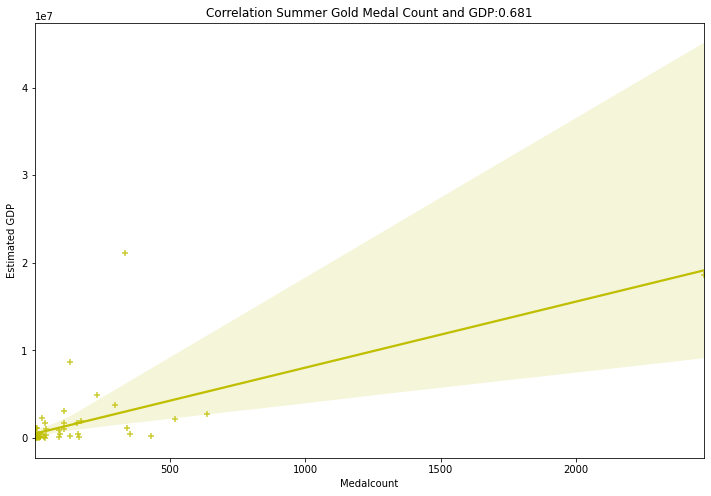

In [77]:
a_dims = (12, 8)

# fig, ax =pyplot.subplots(1,2)

fig, ax = pyplot.subplots(figsize=a_dims)

ax = plt.pyplot.gca()
ax.set_title("Correlation Summer Gold Medal Count and GDP:" +str(round( world_gold_summer['Medalcount'].corr(world_gold_summer['gdp_md_est']) ,3)))
sns.regplot(data=world_gold_summer, x="Medalcount", y="gdp_md_est", marker="+", color="y")
ax.set_ylabel("Estimated GDP")


Text(0, 0.5, 'Estimated GDP')

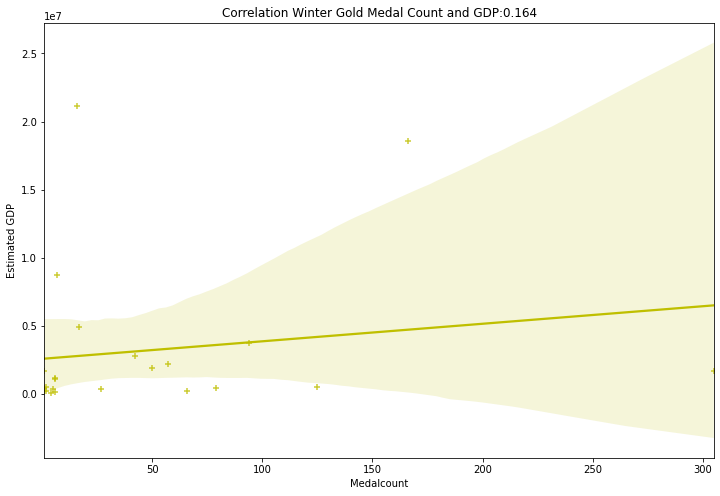

In [78]:
a_dims = (12, 8)

# fig, ax =pyplot.subplots(1,2)

fig, ax = pyplot.subplots(figsize=a_dims)

ax = plt.pyplot.gca()
ax.set_title("Correlation Winter Gold Medal Count and GDP:" +str(round( world_gold_winter['Medalcount'].corr(world_gold_winter['gdp_md_est']) ,3)))
sns.regplot(data=world_gold_winter, x="Medalcount", y="gdp_md_est", marker="+", color="y")
ax.set_ylabel("Estimated GDP")

Text(0, 0.5, 'Estimated GDP')

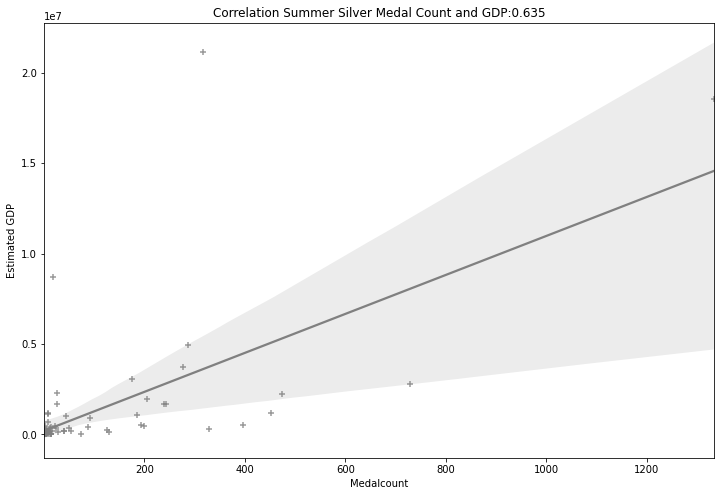

In [79]:
a_dims = (12, 8)

# fig, ax =pyplot.subplots(1,2)

fig, ax = pyplot.subplots(figsize=a_dims)

ax = plt.pyplot.gca()
ax.set_title("Correlation Summer Silver Medal Count and GDP:" +str(round( world_slv_summer['Medalcount'].corr(world_slv_summer['gdp_md_est']) ,3)))
sns.regplot(data=world_slv_summer, x="Medalcount", y="gdp_md_est", marker="+", color="grey")
ax.set_ylabel("Estimated GDP")

Text(0, 0.5, 'Estimated GDP')

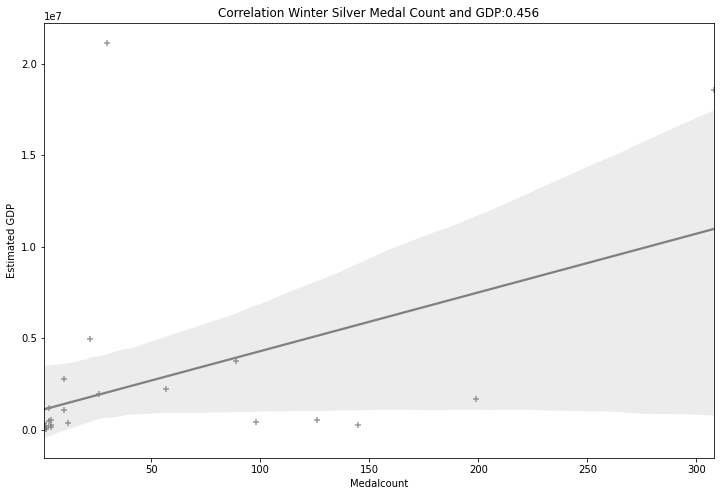

In [80]:
a_dims = (12, 8)

# fig, ax =pyplot.subplots(1,2)

fig, ax = pyplot.subplots(figsize=a_dims)

ax = plt.pyplot.gca()
ax.set_title("Correlation Winter Silver Medal Count and GDP:" +str(round( world_slv_winter['Medalcount'].corr(world_slv_winter['gdp_md_est']) ,3)))
sns.regplot(data=world_slv_winter, x="Medalcount", y="gdp_md_est", marker="+", color="grey")
ax.set_ylabel("Estimated GDP")

Text(0, 0.5, 'Estimated GDP')

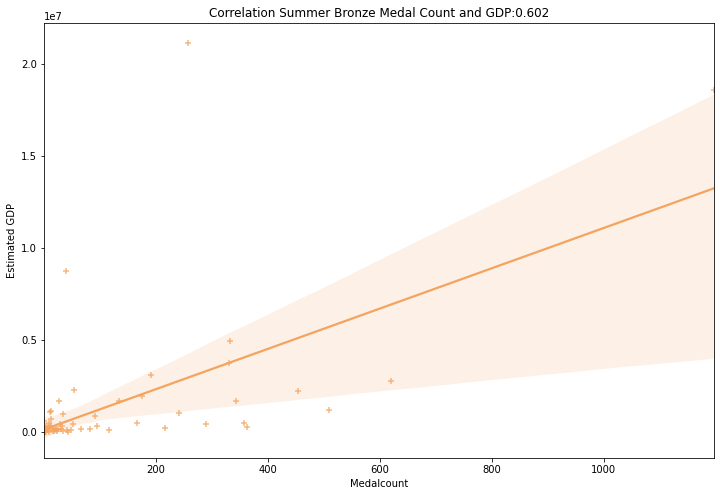

In [81]:
a_dims = (12, 8)

# fig, ax =pyplot.subplots(1,2)

fig, ax = pyplot.subplots(figsize=a_dims)

ax = plt.pyplot.gca()
ax.set_title("Correlation Summer Bronze Medal Count and GDP:" +str(round( world_brnz_summer['Medalcount'].corr(world_brnz_summer['gdp_md_est']) ,3)))
sns.regplot(data=world_brnz_summer, x="Medalcount", y="gdp_md_est", marker="+", color="sandybrown")
ax.set_ylabel("Estimated GDP")

Text(0, 0.5, 'Estimated GDP')

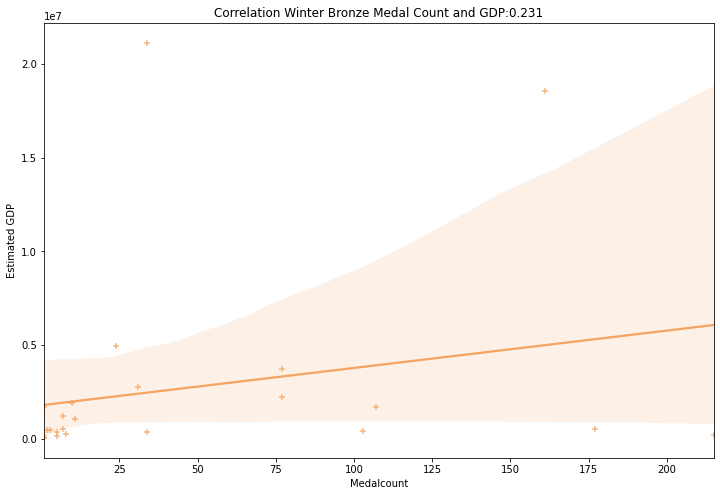

In [82]:
a_dims = (12, 8)

# fig, ax =pyplot.subplots(1,2)

fig, ax = pyplot.subplots(figsize=a_dims)

ax = plt.pyplot.gca()
ax.set_title("Correlation Winter Bronze Medal Count and GDP:" +str(round( world_brnz_winter['Medalcount'].corr(world_brnz_winter['gdp_md_est']) ,3)))
sns.regplot(data=world_brnz_winter, x="Medalcount", y="gdp_md_est", marker="+", color="sandybrown")
ax.set_ylabel("Estimated GDP")

In [83]:
# countries= gold_winners['Team'].unique()

# # Will hold dict of {team : df(team's gold winners)}
# gold_countries = dict()
# for x in countries:
#   gold_countries[x]=gold_winners[gold_winners["Team"]==x]

# # slv
# countries= slv_winners['Team'].unique()
# slv_countries = dict()
# for x in countries:
#   slv_countries[x]=slv_winners[slv_winners["Team"]==x]

# # brnz
# countries= brnz_winners['Team'].unique()
# brnz_countries = dict()
# for x in countries:
#   brnz_countries[x]=brnz_winners[brnz_winners["Team"]==x]

# # ex:
# gold_countries["China"].head()

In [84]:
# # dict holds {country: dict(year:#medals)}
# gold_years = dict()
# for x in gold_countries:
#   df = gold_countries[x]
#   df = df.sort_values(by=['Year'])
#   year_wins = dict()
#   for i in df["Year"].unique():
#     year_wins[i] = df[df["Year"]==i].shape[0]
#   gold_years[x] = year_wins

# slv_years = dict()
# for x in slv_countries:
#   df =slv_countries[x]
#   df = df.sort_values(by=['Year'])
#   year_wins = dict()
#   for i in df["Year"].unique():
#     year_wins[i] = df[df["Year"]==i].shape[0]
#   slv_years[x] = year_wins

# brnz_years = dict()
# for x in brnz_countries:
#   df = brnz_countries[x]
#   df = df.sort_values(by=['Year'])
#   year_wins = dict()
#   for i in df["Year"].unique():
#     year_wins[i] = df[df["Year"]==i].shape[0]
#   brnz_years[x] = year_wins
  
# print(brnz_years)


In [85]:
# At this point we have number of each medal won by each team for every year in the dataset
